In [ ]:
# 📦 Install required libraries
!pip install yfinance
!pip install lxml
!pip install beautifulsoup4


# 📁 Import libraries
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt



In [ ]:
# 📊 Question 1: Extract Tesla Stock Data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
print("Tesla Stock Data:")
print(tesla_data.head())

Tesla Stock Data:
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [ ]:
#Question 2:Tesla Revenue Data (Web Scraping)

import pandas as pd
import requests
from bs4 import BeautifulSoup

# Use IBM's static revenue page
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

# Find all tables
tables = soup.find_all("table")

# Extract Tesla revenue table
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        df = pd.read_html(str(table))[0]
        tesla_revenue = df.rename(columns={df.columns[0]: "Date", df.columns[1]: "Revenue"})
        tesla_revenue.dropna(inplace=True)
        break

# Clean revenue column
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace('[\$,]', '', regex=True).astype(float)

# Display last few rows
print("Tesla Revenue Data:")
print(tesla_revenue.tail())

Tesla Revenue Data:
          Date  Revenue
48  2010-09-30     31.0
49  2010-06-30     28.0
50  2010-03-31     21.0
52  2009-09-30     46.0
53  2009-06-30     27.0


/tmp/ipython-input-3948920708.py:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [ ]:
# 📊 Question 3: Extract GameStop Stock Data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
print("GameStop Stock Data:")
print(gme_data.head())

GameStop Stock Data:
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [ ]:
# 🌐 Question 4: Extract GameStop Revenue Data
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
html = requests.get(url, headers=headers).text
soup = BeautifulSoup(html, "html.parser")

tables = soup.find_all("table")
for table in tables:
    if "Quarterly Revenue" in table.get_text():
        df = pd.read_html(str(table))[0]
        break

df.columns = ["Date", "Revenue"]
df["Revenue"] = df["Revenue"].replace("[\$,]", "", regex=True).astype(float)
df["Date"] = pd.to_datetime(df["Date"])
print(df.tail())

         Date  Revenue
49 2010-06-30     28.0
50 2010-03-31     21.0
51 2009-12-31      NaN
52 2009-09-30     46.0
53 2009-06-30     27.0


In [ ]:
# 📈 Question 5 & 6: Plotting Function
def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(12,6))

    ax1.plot(stock_data['Date'], stock_data['Close'], label='Stock Price', color='blue')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title(f"{stock_name} Stock Price vs Revenue")

    ax2 = ax1.twinx()
    # Ensure revenue_data has data before plotting
    if not revenue_data.empty:
        ax2.plot(pd.to_datetime(revenue_data['Date']), revenue_data['Revenue'].str.replace(',', '').astype(float),
                 label='Revenue', color='orange')
        ax2.set_ylabel('Revenue (Millions USD)', color='orange')
        ax2.tick_params(axis='y', labelcolor='orange')
    else:
        print(f"No revenue data available for {stock_name} to plot.")


    fig.tight_layout()
    plt.legend()
    plt.show()



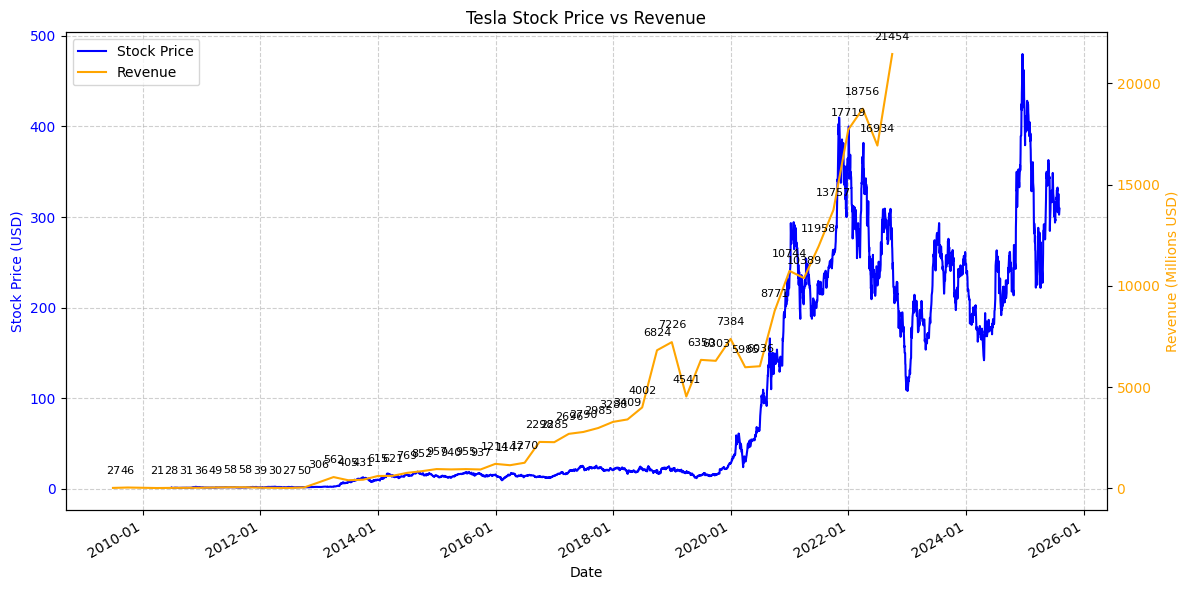

In [ ]:
# 📈 Question 5: Tesla Graph
make_graph(tesla_data, tesla_revenue, "Tesla")

In [ ]:
gme_revenue = df

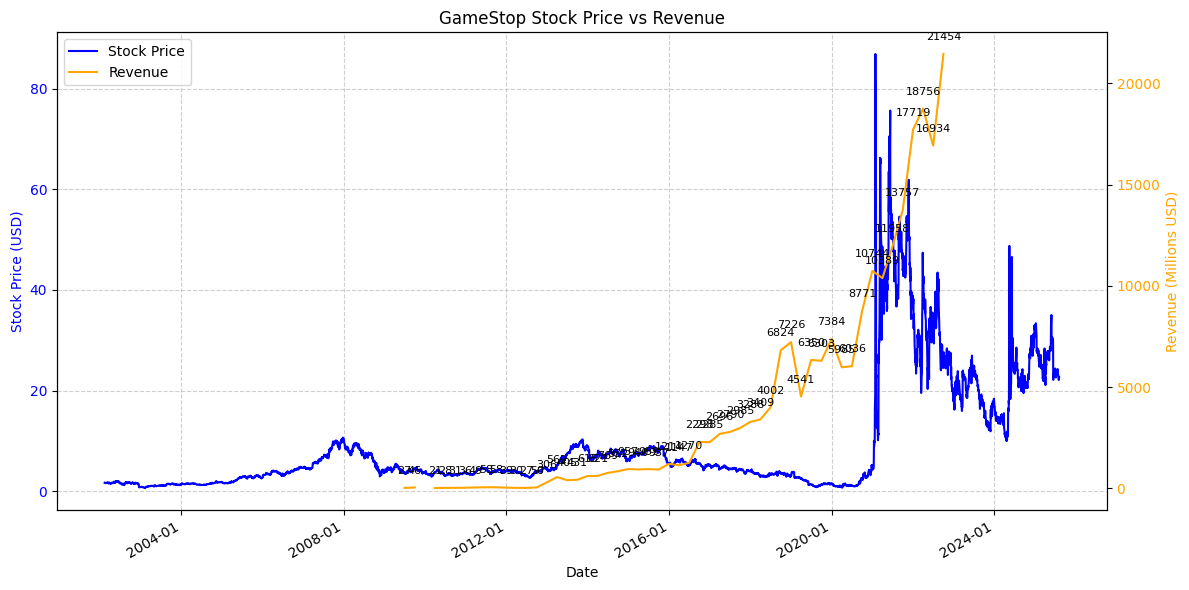

In [ ]:
# 📈 Question 6: GameStop Graph
make_graph(gme_data, gme_revenue, "GameStop")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot stock price
    ax1.plot(stock_data['Date'], stock_data['Close'], label='Stock Price', color='blue')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title(f"{stock_name} Stock Price vs Revenue")
    ax1.grid(True, which='major', linestyle='--', alpha=0.6)
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    fig.autofmt_xdate()

    # Twin axis for revenue
    ax2 = ax1.twinx()

    if not revenue_data.empty:
        # Ensure 'Date' column is datetime
        revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
        # Ensure 'Revenue' column is numeric
        revenue_data['Revenue'] = pd.to_numeric(revenue_data['Revenue'], errors='coerce')
        ax2.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='orange')
        ax2.set_ylabel('Revenue (Millions USD)', color='orange')
        ax2.tick_params(axis='y', labelcolor='orange')

        # Optional: annotate revenue points
        for index, row in revenue_data.iterrows():
            if pd.notna(row['Revenue']): # Check for NaN values before annotating
                 ax2.annotate(f"{row['Revenue']:.0f}", (row['Date'], row['Revenue']),
                         textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)
    else:
        print(f"No revenue data available for {stock_name} to plot.")

    # Combine legends
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

    fig.tight_layout()
    plt.show()